In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('/content/drive/MyDrive/data/combined_data.csv')

In [47]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [48]:
df=df.dropna()

In [49]:
x=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
dtree=DecisionTreeRegressor(criterion="mse")  

In [54]:
dtree.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse')

In [55]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on test set: 0.6898243310747431


In [56]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,x,y,cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

In [57]:
score.mean()

0.4287879963531508

TREE visualisation

In [58]:
pip install  pydotplus

In [59]:
pip install graphviz

In [60]:
import sklearn
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

In [61]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [62]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


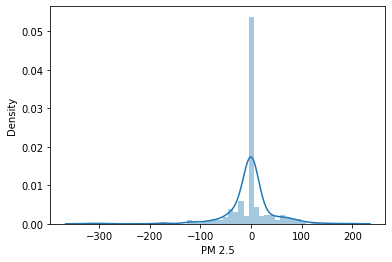

In [63]:
prediction=dtree.predict(X_test)
sns.distplot(y_test-prediction)

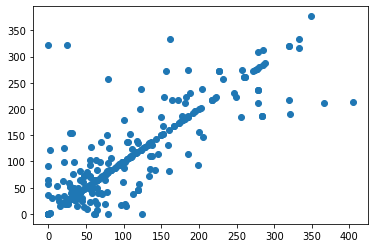

In [64]:
plt.scatter(y_test,prediction)

HYPERPARAMETER TUNING

In [65]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [66]:

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [69]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [70]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits

 Time taken: 0 hours 7 minutes and 16.85 seconds.


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [71]:
random_search.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [72]:
random_search.best_score_


-3131.6489619178874

In [73]:
predictions=random_search.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


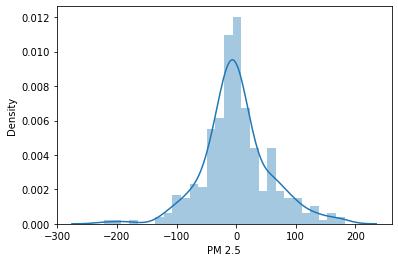

In [74]:
sns.distplot(y_test-predictions)

In [75]:
from sklearn import metrics

In [76]:
score.mean()

0.4287879963531508

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 23.341996951219514
MSE: 2222.0368880208334
RMSE: 47.13848627205623


In [78]:
import pickle 
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)